##  Lending Club Case Study - Analysis


- The data given for analysis contains the information about past loan applicants and whether they ‘defaulted’ or not. 
- The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

#### Business Objectives

- This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

- The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 111)
pd.set_option('display.max_rows', 150)

%matplotlib inline

In [2]:
#Reading data
df = pd.read_csv('loan.csv',dtype = {'last_pymnt_amnt':float},encoding = "ISO-8859-1", low_memory=False)

# DATA UNDERSTANDING

In [3]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [5]:
df.shape

(39717, 111)

In [6]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
df.describe()#(percentiles = [0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# DATA CLEANING

In [9]:
#Percentage of null values in each column
round(df.isnull().sum()/len(df)*100,2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [10]:
#we can see from the above results have 100% missing values.
#We can remove those columns first.
#list down those column names first

emptycolumns=df.columns[round(df.isnull().sum()/len(df)*100,2)==100]
print(emptycolumns)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [11]:
#Number of empty columns
print(len(emptycolumns))

54


In [12]:
#drop the above 54 columns with 100% null values
df1=df.drop(emptycolumns,axis=1)

In [13]:
#WE can remove columns with 90% and above null values too
emptycolumns90=df1.columns[round(df1.isnull().sum()/len(df1)*100,2)>=90]
print(emptycolumns90)

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')


In [14]:
# all the above columns are not significant for EDA. So lets drop those too
df2=df1.drop(emptycolumns90,axis=1)

In [15]:
#now we are left with 55 columns
df2.shape

(39717, 55)

In [16]:
#check number of unique values in each columns
df2.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d          

In [17]:
#We can remove columns with only one unique value. 
#This is done because there is no sense in keeping these to analyse the impact of these on the target varaible
for col in df2.columns:
    if len(df2[col].unique()) == 1:
        print(col)
        df2.drop(col,inplace=True,axis=1)


pymnt_plan
initial_list_status
policy_code
application_type
acc_now_delinq
delinq_amnt


In [18]:
#Checking columns with 2 unique values. Analuyse the results.
for col in df2.columns:
    if len(df2[col].unique()) == 2:
        print(col)

term
collections_12_mths_ex_med
chargeoff_within_12_mths
tax_liens


In [19]:
df2["collections_12_mths_ex_med"].unique()


array([ 0., nan])

In [20]:
df2["chargeoff_within_12_mths"].unique()

array([ 0., nan])

In [21]:
df2["tax_liens"].unique()

array([ 0., nan])

In [22]:
df2["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [23]:
df2["pub_rec_bankruptcies"].unique()

array([ 0.,  1.,  2., nan])

#We can remove the 3 columns collections_12_mths_ex_med,chargeoff_within_12_mths,tac_liens except 'term'
#as their unique values are 0,nan

In [24]:
df2.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],inplace=True,axis=1)

In [25]:
#now we have 46 columns
df2.shape

(39717, 46)

In [26]:
df2.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0


In [27]:
df2.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [28]:
insignificant_columns=['id', 'member_id','installment', 'sub_grade', 'emp_title','url', 'desc', 'title',
                       'zip_code','delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'
        ]
df2.drop(columns=insignificant_columns,inplace=True)

In [29]:
df2.shape

(39717, 19)

In [30]:
#Checking ROWS with missing values
df2.isnull().sum(axis=1).max()

1

In [31]:
#checking the number of rows with more than 80% null values .We have 17 columns now
len(df2[df2.isnull().sum(axis=1)>=10].index)

0

In [32]:
#checking the number of rows with more than 80% null values .We have 17 columns now
len(df2[df2.isnull().sum(axis=1)>=2].index)

0

In [33]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
loan_amnt               39717 non-null int64
funded_amnt             39717 non-null int64
funded_amnt_inv         39717 non-null float64
term                    39717 non-null object
int_rate                39717 non-null object
grade                   39717 non-null object
emp_length              38642 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
verification_status     39717 non-null object
issue_d                 39717 non-null object
loan_status             39717 non-null object
purpose                 39717 non-null object
addr_state              39717 non-null object
dti                     39717 non-null float64
pub_rec                 39717 non-null int64
total_pymnt             39717 non-null float64
total_pymnt_inv         39717 non-null float64
pub_rec_bankruptcies    39020 non-null float64
dtypes: float6

In [34]:
#int_rate ,term and emp_length are of type object in the dataset.let us convert it into float and int respectively



In [35]:
#int_rate is in the format 10.65%. We have to remove the '%' first and then convert it into float
df2["int_rate"] = df2["int_rate"].apply(lambda x: pd.to_numeric(x.split("%")[0]))


In [36]:
df2["int_rate"].dtype

dtype('float64')

In [37]:
# emp_length values are 10+ years, <1 years etc. let us remove these null values before converting it into int. 

df2.dropna(subset=['emp_length'], inplace=True)

In [38]:
# using regular expression to extract numeric values from the string
import re
df2['emp_length'] = df2['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])


In [39]:
#Changing the data type
df2['emp_length'] = df2['emp_length'].apply(lambda x: pd.to_numeric(x))

In [40]:
#Changing the datatype from object to int after formatting the value

df2["term"]=df2["term"].apply(lambda x: x[0:4])

df2["term"]=df2["term"].apply(lambda x: pd.to_numeric(x))

In [41]:
df2.head(3) 

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,B,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,5863.155187,5833.84,0.0
1,2500,2500,2500.0,60,15.27,C,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,1008.710000,1008.71,0.0
2,2400,2400,2400.0,36,15.96,C,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,3005.666844,3005.67,0.0


In [42]:
#Checking the unique values
df2.nunique().sort_values()

term                        2
verification_status         3
loan_status                 3
pub_rec_bankruptcies        3
home_ownership              5
pub_rec                     5
grade                       7
emp_length                 10
purpose                    14
addr_state                 50
issue_d                    55
int_rate                  371
loan_amnt                 880
funded_amnt              1038
dti                      2863
annual_inc               5100
funded_amnt_inv          8097
total_pymnt_inv         36572
total_pymnt             36894
dtype: int64

In [43]:
#Checking the unique values for the variable "verification_status"
df2["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [44]:
df2["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

# Target variable - loan_status. 

The target variable is loan status. The aim is to compare the average default rates across various independent variables and identify 5 most significant independent variables that affect default rate the most.

In [45]:
#Next, let's have a look at the target variable - loan_status. 

df2["loan_status"].nunique()
df2["loan_status"].unique()
df2["loan_status"].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [46]:
#We are removing Current loan status from our analysis as we are interested only in the past defaulted cases
df2=df2[df2["loan_status"]!='Current']

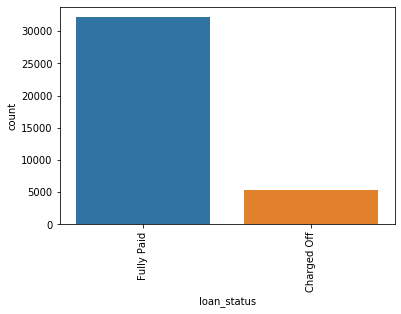

In [47]:
sns.countplot(df2.loan_status)
plt.xticks(rotation = 90)
plt.show()

In [48]:
#We need to relabel the values to a binary form - 0 or 1, 
#1 indicating that the person has defaulted and 0 otherwise.
df2["loan_status"]=df2["loan_status"].apply(lambda x: 0 if x=='Fully Paid' else 1 )

In [49]:
df2["loan_status"]=df2["loan_status"].apply(lambda x: pd.to_numeric(x))

In [50]:
df2["loan_status"].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [51]:
#issue_d: The month which the loan was funded .Lets split the available date into month and year column.
df2.issue_d = pd.to_datetime(df2.issue_d, format='%b-%y')
df2['issue_d_month'] = df2['issue_d'].dt.month
df2['issue_d_year'] = df2['issue_d'].dt.year

In [52]:
#derived matrix, diff in loan amnt applied and the actual funded amount by the investors
df2["diffinloanfund"]=df2["funded_amnt_inv"]-df2["loan_amnt"]

In [53]:
df2.shape 

(37544, 22)

In [54]:
#After cleaning, write df2 to a new csv, master_loan.This will be used for further data analysis
df2.to_csv('master_loan.csv', encoding='utf-8', index=False)

# DATA ANALYSIS

In [55]:
loan=pd.read_csv("master_loan.csv")

In [56]:
loan.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,issue_d_month,issue_d_year,diffinloanfund
0,5000,5000,4975.0,36,10.65,B,10,RENT,24000.0,Verified,2011-12-01,0,credit_card,AZ,27.65,0,5863.155187,5833.84,0.0,12,2011,-25.0
1,2500,2500,2500.0,60,15.27,C,1,RENT,30000.0,Source Verified,2011-12-01,1,car,GA,1.00,0,1008.710000,1008.71,0.0,12,2011,0.0


In [57]:
loan.shape

(37544, 22)

In [58]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec', 'total_pymnt', 'total_pymnt_inv',
       'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_year',
       'diffinloanfund'],
      dtype='object')

In [59]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37544 entries, 0 to 37543
Data columns (total 22 columns):
loan_amnt               37544 non-null int64
funded_amnt             37544 non-null int64
funded_amnt_inv         37544 non-null float64
term                    37544 non-null int64
int_rate                37544 non-null float64
grade                   37544 non-null object
emp_length              37544 non-null int64
home_ownership          37544 non-null object
annual_inc              37544 non-null float64
verification_status     37544 non-null object
issue_d                 37544 non-null object
loan_status             37544 non-null int64
purpose                 37544 non-null object
addr_state              37544 non-null object
dti                     37544 non-null float64
pub_rec                 37544 non-null int64
total_pymnt             37544 non-null float64
total_pymnt_inv         37544 non-null float64
pub_rec_bankruptcies    36847 non-null float64
issue_d_month   

In [60]:
loan["loan_status"].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

# Univariate analysis 

#  Univariate analysis  of Continuous variables

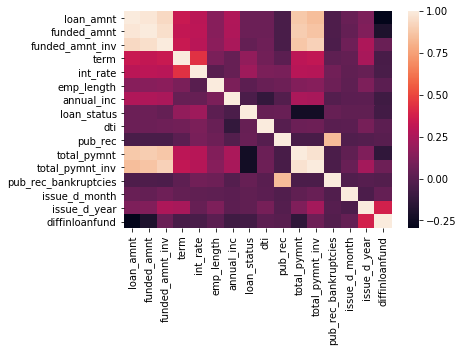

In [61]:
## plotting a correlation matrix for entire data to identify the patterns

loan_correlation_matrix = loan.corr()
sns.heatmap(loan_correlation_matrix)

In [62]:
# The percentage average of default rate
round(np.mean(loan['loan_status'])*100, 2)

14.38

The overall default rate is about 14.59%. 
Any variable that increases percentage of default to higher than 16.5% should be considered a business risk. (16.5 is 18% higher than 13.97 - a large enough increase) 

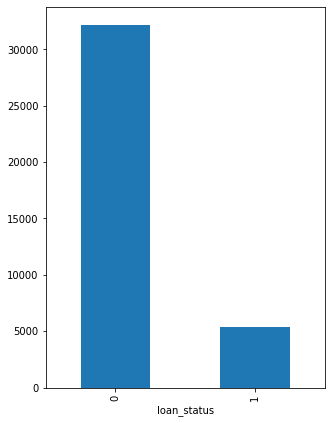

In [63]:
plt.figure(figsize=(5,7))
ax = loan.groupby('loan_status').funded_amnt_inv.count().plot.bar()
plt.show()

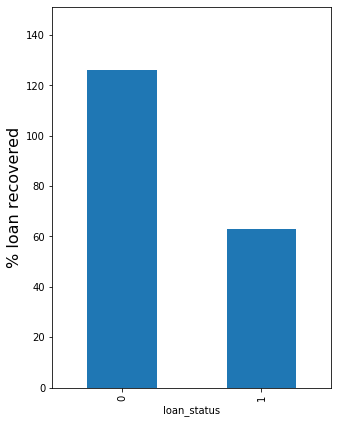

In [64]:
plt.figure(figsize=(5,7))
ax = (loan.groupby('loan_status').total_pymnt.sum() * 100 /loan.groupby('loan_status').funded_amnt_inv.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)


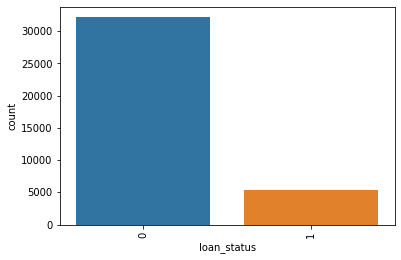

In [65]:
sns.countplot(loan.loan_status)
plt.xticks(rotation = 90)
plt.show()

In [66]:
loan.groupby('loan_status')['loan_amnt'].describe(percentiles = [0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
loan_status,,,,,,,,,,,,,
0,32145.0,10930.419972,7206.743260,500.0,2400.0,3200.0,5400.0,9600.0,15000.0,21000.0,25000.0,35000.0,35000.0
1,5399.0,12244.077607,8086.515636,900.0,2400.0,3385.0,6000.0,10000.0,17000.0,25000.0,27577.5,35000.0,35000.0


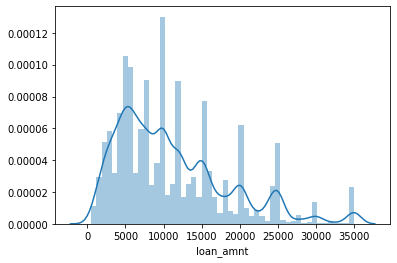

In [67]:
sns.distplot(loan.loan_amnt)

In [68]:
loan.groupby('loan_status')['funded_amnt_inv'].describe(percentiles = [0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
loan_status,,,,,,,,,,,,,
0,32145.0,10164.906062,6913.600639,0.0,1900.0,2975.000000,5000.0,8741.04241,13975.0,19975.0,24403.977388,33939.000000,35000.0
1,5399.0,10968.702841,7677.563440,0.0,1600.0,2644.999317,5000.0,9575.00000,15000.0,21700.0,24975.000000,34969.122603,35000.0


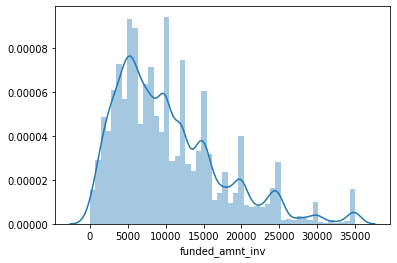

In [69]:
sns.distplot(loan.funded_amnt_inv)

### Observation:

Both the applied loan amount and funded amount by investors distribution is slightly right-skewed.And mean is greater 
than the median. Funding amounts see a spike around each 5000 boundary. 


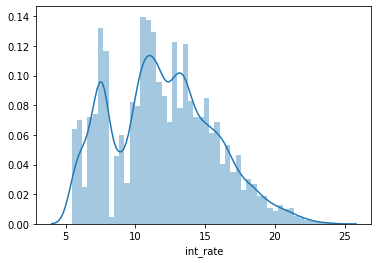

In [70]:
sns.distplot(loan.int_rate)

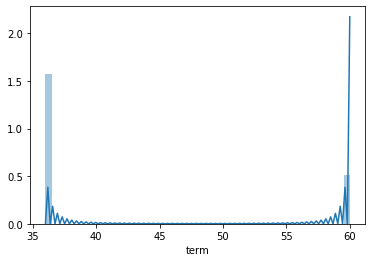

In [71]:
sns.distplot(loan.term)

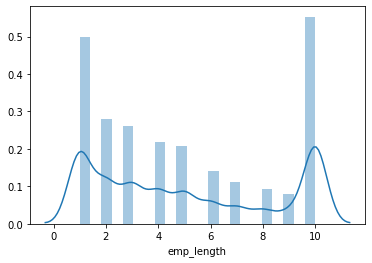

In [72]:
sns.distplot(loan.emp_length)

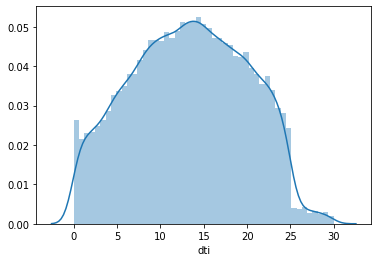

In [73]:
sns.distplot(loan.dti)

In [74]:
loan["annual_inc"].describe(percentiles = [0.01,0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
1%       1.500000e+04
5%       2.400000e+04
10%      3.000000e+04
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
90%      1.166724e+05
95%      1.420000e+05
99%      2.350000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

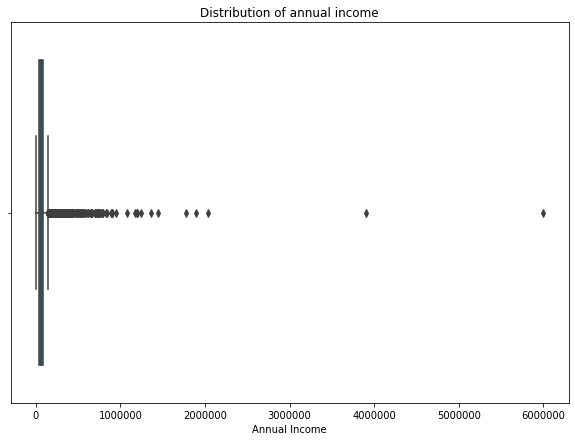

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.boxplot(x='annual_inc', data=loan)
plt.title('Distribution of annual income')
plt.xlabel('Annual Income')
plt.show()

In [76]:
# annual_inc 3.5,4.5,5
def incomegroup(n):
    if n <= 20000:
        return 'low'
    elif n > 20000 and n <=45000:
        return 'medium'
    elif n > 45000 and n <=85000:
        return 'high'
    else:
        return 'very high'
    
loan['annual_inc'] = loan['annual_inc'].apply(lambda x: incomegroup(x))

In [77]:
loan["int_rate"].describe(percentiles = [0.01,0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
1%           5.420000
5%           6.170000
10%          7.140000
25%          8.940000
50%         11.830000
75%         14.420000
90%         16.820000
95%         18.390000
99%         20.990000
max         24.400000
Name: int_rate, dtype: float64

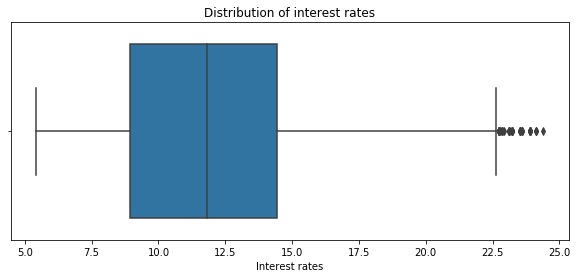

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.boxplot(x='int_rate', data=loan)
plt.title('Distribution of interest rates')
plt.xlabel('Interest rates')
plt.show()

In [79]:
# interest rate 9,15,20
def interestrate_group(n):
    if n <= 9:
        return 'low'
    elif n > 9 and n <=15:
        return 'medium'
    elif n > 15 and n <=20:
        return 'high'
    else:
        return 'very high'
    
loan['int_rate'] = loan['int_rate'].apply(lambda x: interestrate_group(x))

In [80]:
loan["dti"].describe(percentiles = [0.01,0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    37544.000000
mean        13.284186
std          6.660551
min          0.000000
1%           0.360000
5%           2.130000
10%          4.080000
25%          8.160000
50%         13.380000
75%         18.550000
90%         22.290000
95%         23.790000
99%         26.510000
max         29.990000
Name: dti, dtype: float64

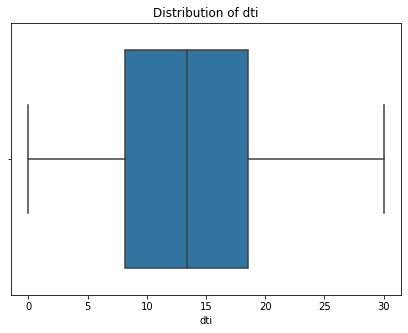

In [81]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
sns.boxplot(x='dti', data=loan)
plt.title('Distribution of dti')
plt.xlabel('dti')
plt.show()

In [82]:
# dti 4,20,25
def dti(n):
    if n <= 4:
        return 'low'
    elif n > 4 and n <=20:
        return 'medium'
    elif n > 20 and n <=25:
        return 'high'
    else:
        return 'very high'
    
loan['dti'] = loan['dti'].apply(lambda x: dti(x))

In [83]:

loan["funded_amnt_inv"].describe(percentiles = [0.01,0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    37544.000000
mean     10280.495739
std       7034.124211
min          0.000000
1%         650.000000
5%        1825.000000
10%       2925.000000
25%       5000.000000
50%       8850.000000
75%      14075.000000
90%      20000.000000
95%      24549.300083
99%      34725.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

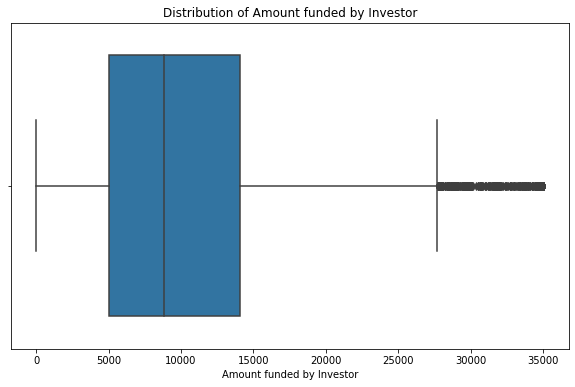

In [84]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.boxplot(x='funded_amnt_inv', data=loan)
plt.title('Distribution of Amount funded by Investor')
plt.xlabel('Amount funded by Investor')
plt.show()

In [85]:
# funded_amnt_inv 4,20,25
def funded_amnt_inv(n):
    if n <= 3000:
        return 'low'
    elif n > 3000 and n <=15000:
        return 'medium'
    elif n > 15000 and n <=25000:
        return 'high'
    else:
        return 'very high'
    
loan['funded_amnt_inv'] = loan['funded_amnt_inv'].apply(lambda x: funded_amnt_inv(x))

In [86]:
loan["emp_length"].describe(percentiles = [0.01,0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    37544.000000
mean         5.061048
std          3.401750
min          1.000000
1%           1.000000
5%           1.000000
10%          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
90%         10.000000
95%         10.000000
99%         10.000000
max         10.000000
Name: emp_length, dtype: float64

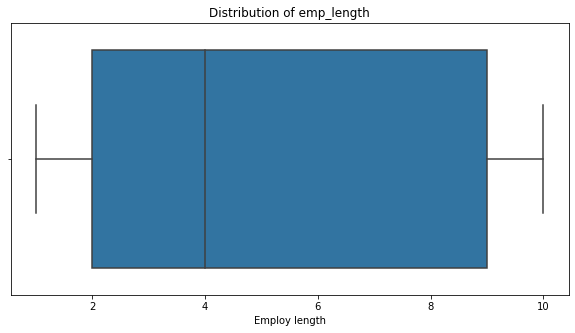

In [87]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.boxplot(x='emp_length', data=loan)
plt.title('Distribution of emp_length')
plt.xlabel('Employ length')
plt.show()

In [88]:
# emp_length
def emp_length(n):
    if n <= 2:
        return 'less experienced'
    elif n > 2 and n <=5:
        return 'medium experienced'
    elif n > 5 and n <= 9:
        return 'highly experienced'
    else:
        return 'very highly experienced'
    
loan['emp_length'] = loan['emp_length'].apply(lambda x: emp_length(x))

# Plotting  variables after binning

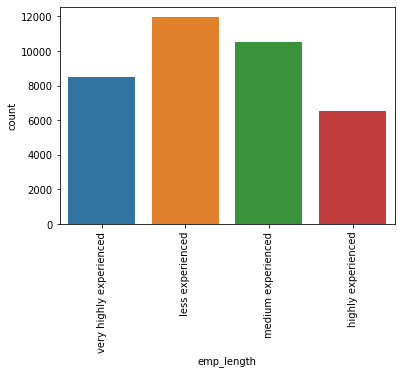

In [89]:
#no of experience of customers
sns.countplot(loan.emp_length)
plt.xticks(rotation = 90)
plt.show()

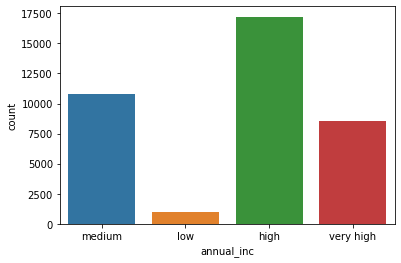

In [90]:
##Annual income
sns.countplot(loan.annual_inc)

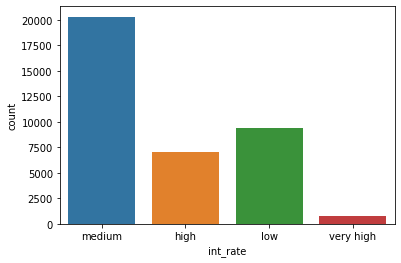

In [91]:
##int_rate
sns.countplot(loan.int_rate)

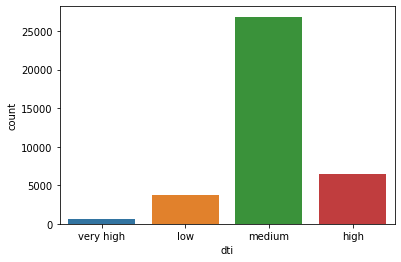

In [92]:
##dti
sns.countplot(loan.dti)

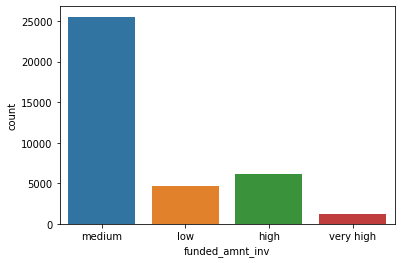

In [93]:
##funded_amnt_inv
sns.countplot(loan.funded_amnt_inv)

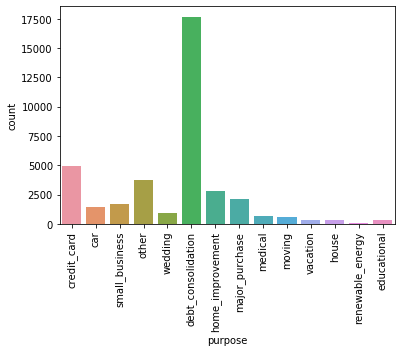

In [94]:
##Purpose of loan
sns.countplot(loan.purpose)
plt.xticks(rotation = 90)
plt.show()

# Bivariate Analysis

- Find out the default rate for each category like grade, home ownership,term,int_rate,annual income
- default rate = number of defaulters/ total number of applicants
- Plot Default rate  vs  significant variables


In [95]:
##############For bi variate analysis,we need to  consider only rows with loan_status =1 #####################
def_loan = loan.loc[loan['loan_status'] == 1]
def_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,issue_d_month,issue_d_year,diffinloanfund
1,2500,2500,low,60,high,C,less experienced,RENT,medium,Source Verified,2011-12-01,1,car,GA,low,0,1008.71,1008.71,0.0,12,2011,0.0
7,5600,5600,medium,60,very high,F,medium experienced,OWN,medium,Source Verified,2011-12-01,1,small_business,CA,medium,0,646.02,646.02,0.0,12,2011,0.0
8,5375,5375,medium,60,medium,B,less experienced,RENT,low,Verified,2011-12-01,1,other,TX,medium,0,1476.19,1469.34,0.0,12,2011,-25.0
11,9000,9000,medium,36,medium,C,less experienced,RENT,medium,Source Verified,2011-12-01,1,debt_consolidation,VA,medium,0,2270.70,2270.70,0.0,12,2011,0.0
13,10000,10000,medium,36,medium,B,medium experienced,RENT,very high,Source Verified,2011-12-01,1,other,CA,medium,0,7471.99,7471.99,0.0,12,2011,0.0


In [96]:
loan.shape

(37544, 22)

In [97]:
def_loan.shape

(5399, 22)

# Default Rate

- default rate for a category= number of defaulters in that category / total number of applicants in that category


In [98]:
#A function to find default rate
##default rate for a category= number of defaulters in that category / total number of applicants in that category

def find_default_rate(var):
    result=dict(round(def_loan.groupby(var)["loan_status"].count()/loan.groupby(var)["loan_status"].count(),2))
    return result

In [99]:
def_loan["income_def_rate"]=def_loan['annual_inc'].map(find_default_rate('annual_inc'))

C:\Users\Chandrashekhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


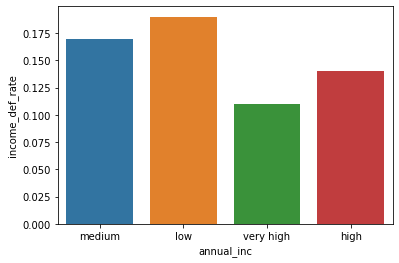

In [100]:
sns.barplot(x='annual_inc',y='income_def_rate',data=def_loan)

Observation:From the above plot(annual income vs default rate among various income group) you can see that the default rate is high in the low income group followed by Medium income group

In [101]:
loan.groupby('loan_status')['annual_inc'].describe()

,count,unique,top,freq
loan_status,,,,
0,32145,4,high,14783
1,5399,4,high,2427


In [102]:
def_loan["purpose_def_ratio"]=def_loan['purpose'].map(find_default_rate('purpose'))

C:\Users\Chandrashekhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


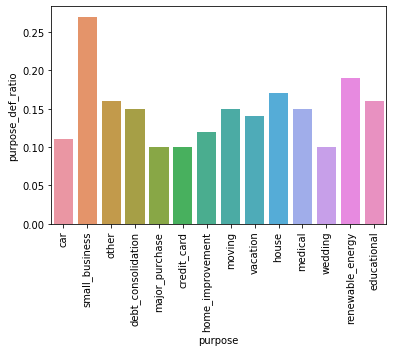

In [103]:
#purpose_def_ratio
sns.barplot(x='purpose',y='purpose_def_ratio',data=def_loan)
plt.xticks(rotation = 90)
plt.show()

In [104]:
loan.groupby('loan_status')['purpose'].describe()

,count,unique,top,freq
loan_status,,,,
0,32145,14,debt_consolidation,14996
1,5399,14,debt_consolidation,2679


In [105]:
# filtering the dataset for the 6 types of purpose of loan mentioned below:
main_purposes = ["small_business","renewable_energy","house","education","medical","debt_consolidation"]
loan = loan[loan['purpose'].isin(main_purposes)]
loan['purpose'].value_counts()

debt_consolidation    17675
small_business         1710
medical                 656
house                   354
renewable_energy         94
Name: purpose, dtype: int64

In [106]:
def_loan["home_owner_def_ratio"]=def_loan['home_ownership'].map(find_default_rate('home_ownership'))


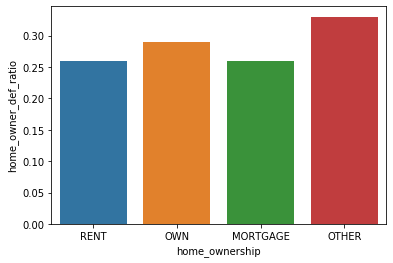

In [107]:
sns.barplot(x='home_ownership',y='home_owner_def_ratio',data=def_loan)

In [108]:
def_loan["int_rate_def_ratio"]=def_loan['int_rate'].map(find_default_rate('int_rate'))


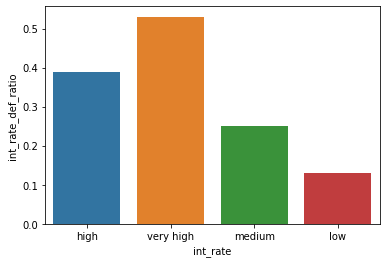

In [109]:
sns.barplot(x='int_rate',y='int_rate_def_ratio',data=def_loan)

In [110]:
loan.groupby('loan_status')['int_rate'].describe()

,count,unique,top,freq
loan_status,,,,
0,17170,4,medium,9464
1,3319,4,medium,1644


In [111]:
def_loan["dti_def_ratio"]=def_loan['dti'].map(find_default_rate('dti'))


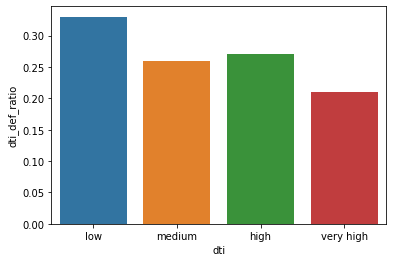

In [112]:
sns.barplot(x='dti',y='dti_def_ratio',data=def_loan)

In [113]:
loan.groupby('loan_status')['dti'].describe()

,count,unique,top,freq
loan_status,,,,
0,17170,4,medium,12440
1,3319,4,medium,2351


In [114]:
def_loan["emp_length_ratio"]=def_loan['emp_length'].map(find_default_rate("emp_length"))
                                                                         


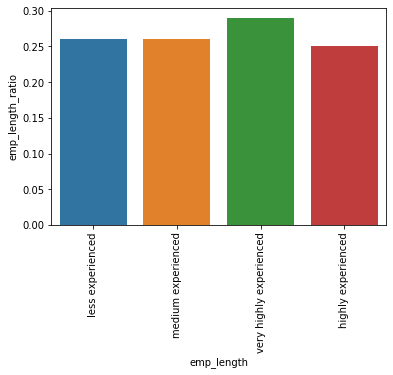

In [115]:
sns.barplot(x='emp_length',y='emp_length_ratio',data=def_loan)
plt.xticks(rotation = 90)
plt.show()

In [116]:
loan.groupby('loan_status')['emp_length'].describe()

,count,unique,top,freq
loan_status,,,,
0,17170,4,less experienced,5399
1,3319,4,less experienced,991


In [117]:
def_loan["grade_def_ratio"]=def_loan['grade'].map(find_default_rate("grade"))


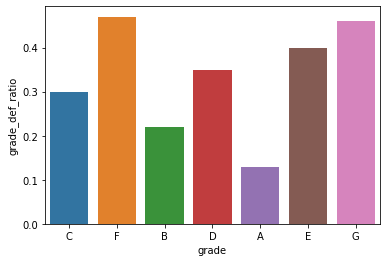

In [118]:
sns.barplot(x='grade',y='grade_def_ratio',data=def_loan)

In [119]:
loan.groupby('loan_status')['grade'].describe()

,count,unique,top,freq
loan_status,,,,
0,17170,7,B,5350
1,3319,7,B,772


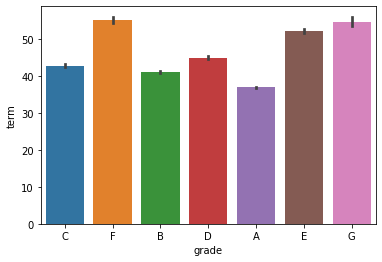

In [120]:
sns.barplot(x='grade',y='term',data=loan)

In [121]:
def_loan["term_def_ratio"]=def_loan['term'].map(find_default_rate("term"))


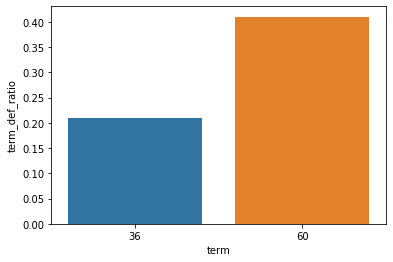

In [122]:
sns.barplot(x='term',y='term_def_ratio',data=def_loan)

In [123]:
loan.groupby('loan_status')['term'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,17170.0,41.694584,10.210181,36.0,36.0,36.0,36.0,60.0
1,3319.0,47.121422,11.969598,36.0,36.0,36.0,60.0,60.0


In [124]:
def_loan["issue_d_year_def_ratio"]=def_loan['issue_d_year'].map(find_default_rate("issue_d_year"))


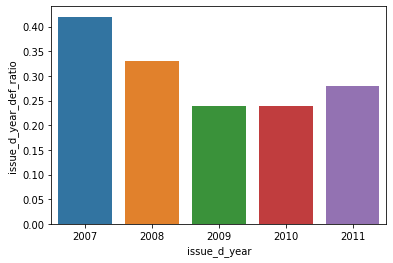

In [125]:
sns.barplot(x='issue_d_year',y='issue_d_year_def_ratio',data=def_loan)

#### Observation:
- In the year 2007 there were more defaults probably because of the recession.
- Following years were good in terms of loan repayment. 
- Hence Lending loans during recession could increase the number of defaulters 

In [126]:
def_loan["issue_d_month_def_ratio"]=def_loan['issue_d_month'].map(find_default_rate("issue_d_month"))


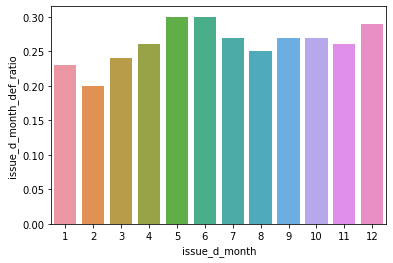

In [127]:
sns.barplot(x='issue_d_month',y='issue_d_month_def_ratio',data=def_loan)

# Segmented Analysis


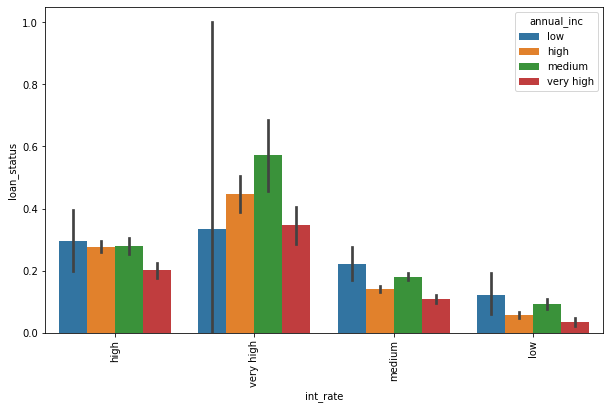

In [128]:
plt.figure(figsize=[10, 6])
sns.barplot(x="int_rate", y="loan_status", hue="annual_inc", data=loan)
plt.xticks(rotation = 90)
plt.show()
 

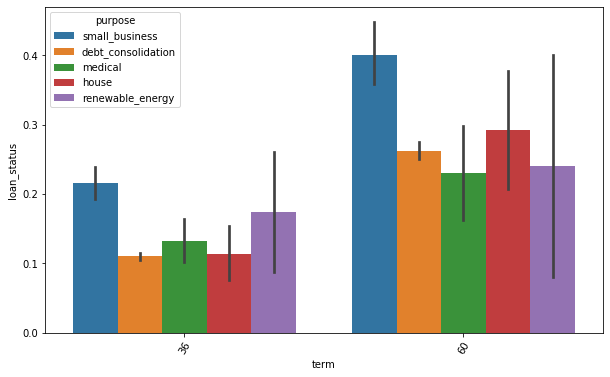

In [129]:
plt.figure(figsize=[10, 6])
g=sns.barplot(x="term", y="loan_status", hue= 'purpose',data=loan)
g.set_xticklabels(g.get_xticklabels(), rotation=60)

plt.show()

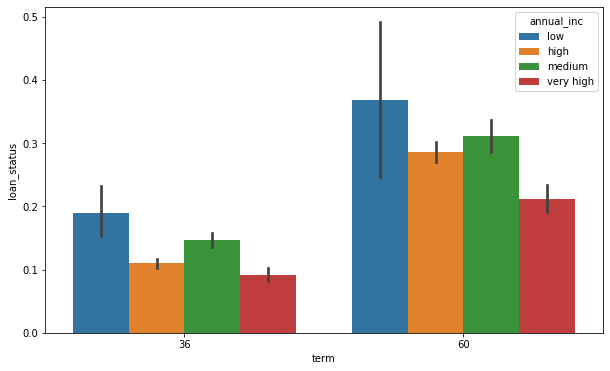

In [130]:
plt.figure(figsize=[10, 6])
sns.barplot(x="term", y="loan_status", hue="annual_inc", data=loan)
plt.show()
 

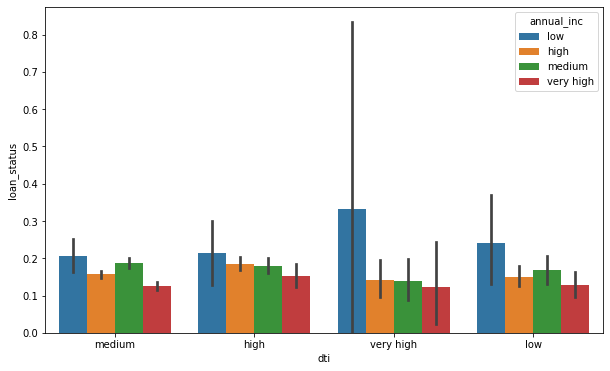

In [131]:
plt.figure(figsize=[10, 6])
sns.barplot(x="dti", y="loan_status", hue="annual_inc", data=loan)
plt.show()

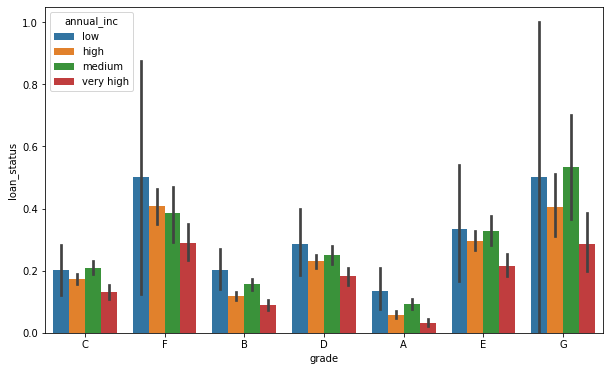

In [132]:
plt.figure(figsize=[10, 6])
sns.barplot(x="grade", y="loan_status", hue="annual_inc", data=loan)
plt.show()

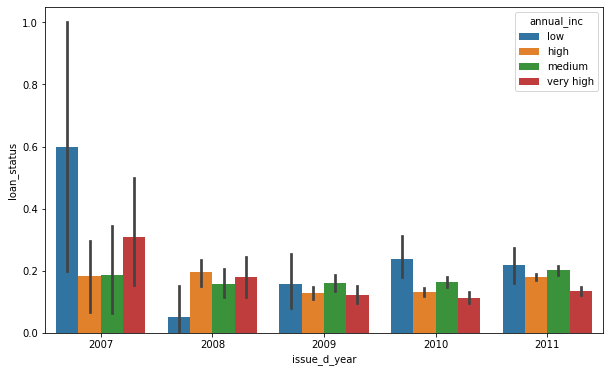

In [133]:
plt.figure(figsize=[10, 6])
sns.barplot(x="issue_d_year", y="loan_status", hue="annual_inc", data=loan)
plt.show()

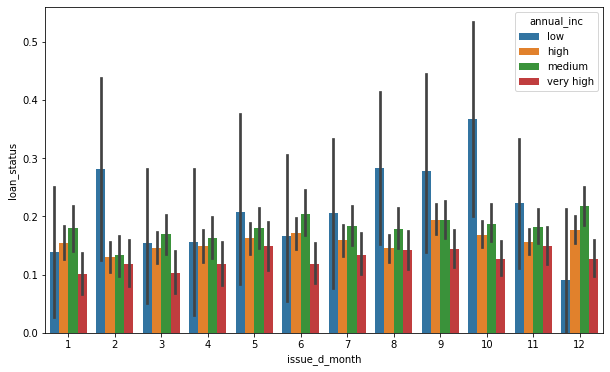

In [134]:
plt.figure(figsize=[10, 6])
sns.barplot(x="issue_d_month", y="loan_status", hue="annual_inc", data=loan)
plt.show()

# OBSERVATIONS
The decreasing order of default rate for each of the significant independant variables are given below:

- 1. Annual income : Low>Medium>High>Very High
- 2. Purpose: small_business>renewable_energy>house>education>medical>other>debt_consolidation
- 3. HomeOwnership:Other>Rent>own>Mortgage
- 4. interest rate:Very High>High>Medium>low>
- 5. dti:High>Medium
- 6. emp_length:veryhigh>high
- 7. grade:G>F>E>D
- 8. term:60>36
- 9. month Dec>Sept>May>
- 10. year 2007>2011>